In [191]:
import pandas as pd
df = pd.read_csv("../data_new.csv")
bertweet_unknown_abbreviations=['tmb',
                                'tftf',
                                'prt',
                                'nts',
                                'mtf',
                                'mrt',
                                'icymi',
                                'ftl',
                                'fomo',
                                'eml',
                                'cr8',
                                'clk',
                                'chk',
                                'bgd',
                                'bfn']

In [192]:

df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])
df = df[~df["abbreviation"].isin(bertweet_unknown_abbreviations)]

In [193]:

print("means sequential: ", df["abbr_sequential_surprisal_mean"].mean(), df["fl_sequential_surprisal_mean"].mean())
print("means mask l2r: ", df["abbr_mask_l2r_surprisal_mean"].mean(), df["fl_mask_l2r_surprisal_mean"].mean())
print("counts: ", df["count_abbr"].mean(), df["count_fl"].mean())

means sequential:  34.627841404506135 69.09262805261561
means mask l2r:  34.627841404506135 128.8366556323186
counts:  561.5714285714286 3860.9761904761904


In [194]:
df_subset = df[df['full_length'].str.contains(" ")]
df_subset = df_subset[df_subset["count_abbr"]>2]
df_subset = df_subset[df_subset["count_fl"]>2]
print(df_subset["abbreviation"])

print("means sequential: ", df_subset["abbr_sequential_surprisal_mean"].mean(), df_subset["fl_sequential_surprisal_mean"].mean())
print("means mask all: ", df_subset["abbr_mask_l2r_surprisal_mean"].mean(), df_subset["fl_mask_l2r_surprisal_mean"].mean())
print("counts: ", df_subset["count_abbr"].mean(), df_subset["count_fl"].mean())

0      idk
1       rn
2      omg
3      idc
7      wtf
14     lmk
15     ily
16    yolo
18     ikr
19     ofc
25     tbh
26     tbt
36     imo
38      ic
40     ftw
45     ema
51     btw
52      br
Name: abbreviation, dtype: object
means sequential:  36.03530587090386 86.50011825561523
means mask all:  36.03530587090386 178.12620968288846
counts:  101.38888888888889 139.83333333333334


In [195]:
df_subset = df[~df['full_length'].str.contains(" ")]
print(df_subset["abbreviation"])

df_subset = df_subset[df_subset["count_abbr"]>2]
df_subset = df_subset[df_subset["count_fl"]>2]
print("means sequential: ", df_subset["abbr_sequential_surprisal_mean"].mean(), df_subset["fl_sequential_surprisal_mean"].mean())
print("means mask all: ", df_subset["abbr_mask_l2r_surprisal_mean"].mean(), df_subset["fl_mask_l2r_surprisal_mean"].mean())
print("counts: ", df_subset["count_abbr"].mean(), df_subset["count_fl"].mean())

5       bro
9       sry
10        v
11        w
12      nvm
20        u
21        2
22        2
23        r
24      abt
31       rt
35       kk
43      fab
46    deets
49      cld
55       b4
56       bc
Name: abbreviation, dtype: object
means sequential:  34.377307415008545 32.34178770587902
means mask all:  34.377307415008545 32.34178770587902
counts:  1165.1875 9847.0


In [196]:
print("per token averages: ", df["fl_seq_avg_per_token"].mean(), df["abbr_seq_avg_per_token"].mean())

per token averages:  32.61276837941762 34.627841404506135


In [197]:
df.corr(method="pearson", numeric_only=True) # .5-1 is strong, .3-.5 is moderate

,count_abbr,count_fl,abbr_mask_l2r_avg_per_token,abbr_seq_avg_per_token,abbr_mask_l2r_surprisal_mean,abbr_sequential_surprisal_mean,fl_mask_l2r_avg_per_token,fl_seq_avg_per_token,fl_mask_l2r_surprisal_mean,fl_sequential_surprisal_mean,abbr_len,fl_len,compression
count_abbr,1.000000,0.757724,-0.434393,-0.434393,-0.434393,-0.434393,-0.129675,-0.041532,-0.299420,-0.314601,-0.618301,-0.410504,-0.063011
count_fl,0.757724,1.000000,-0.250494,-0.250494,-0.250494,-0.250494,-0.197060,-0.132523,-0.295066,-0.323638,-0.509179,-0.394811,-0.223653
abbr_mask_l2r_avg_per_token,-0.434393,-0.250494,1.000000,1.000000,1.000000,1.000000,0.339814,0.257510,0.076078,0.107024,0.231043,0.115183,-0.078831
abbr_seq_avg_per_token,-0.434393,-0.250494,1.000000,1.000000,1.000000,1.000000,0.339814,0.257510,0.076078,0.107024,0.231043,0.115183,-0.078831
abbr_mask_l2r_surprisal_mean,-0.434393,-0.250494,1.000000,1.000000,1.000000,1.000000,0.339814,0.257510,0.076078,0.107024,0.231043,0.115183,-0.078831
abbr_sequential_surprisal_mean,-0.434393,-0.250494,1.000000,1.000000,1.000000,1.000000,0.339814,0.257510,0.076078,0.107024,0.231043,0.115183,-0.078831
fl_mask_l2r_avg_per_token,-0.129675,-0.197060,0.339814,0.339814,0.339814,0.339814,1.000000,0.885955,0.041237,0.151025,0.093361,0.260959,0.092674
fl_seq_avg_per_token,-0.041532,-0.132523,0.257510,0.257510,0.257510,0.257510,0.885955,1.000000,0.232836,0.354923,0.130181,0.371077,0.117107
fl_mask_l2r_surprisal_mean,-0.299420,-0.295066,0.076078,0.076078,0.076078,0.076078,0.041237,0.232836,1.000000,0.983630,0.551676,0.865700,0.543962
fl_sequential_surprisal_mean,-0.314601,-0.323638,0.107024,0.107024,0.107024,0.107024,0.151025,0.354923,0.983630,1.000000,0.531233,0.881226,0.573871


In [198]:
df.corr(method="spearman", numeric_only=True) # >.7 is strong, .4-.6 is moderate

,count_abbr,count_fl,abbr_mask_l2r_avg_per_token,abbr_seq_avg_per_token,abbr_mask_l2r_surprisal_mean,abbr_sequential_surprisal_mean,fl_mask_l2r_avg_per_token,fl_seq_avg_per_token,fl_mask_l2r_surprisal_mean,fl_sequential_surprisal_mean,abbr_len,fl_len,compression
count_abbr,1.000000,0.350870,-0.463833,-0.463833,-0.463833,-0.463833,-0.188630,-0.083704,-0.267207,-0.268949,-0.538755,-0.288067,0.033252
count_fl,0.350870,1.000000,-0.071382,-0.071382,-0.071382,-0.071382,-0.347006,-0.217131,-0.769305,-0.763288,-0.577411,-0.864165,-0.692904
abbr_mask_l2r_avg_per_token,-0.463833,-0.071382,1.000000,1.000000,1.000000,1.000000,0.306069,0.298009,0.171784,0.192343,0.217311,0.148426,-0.026737
abbr_seq_avg_per_token,-0.463833,-0.071382,1.000000,1.000000,1.000000,1.000000,0.306069,0.298009,0.171784,0.192343,0.217311,0.148426,-0.026737
abbr_mask_l2r_surprisal_mean,-0.463833,-0.071382,1.000000,1.000000,1.000000,1.000000,0.306069,0.298009,0.171784,0.192343,0.217311,0.148426,-0.026737
abbr_sequential_surprisal_mean,-0.463833,-0.071382,1.000000,1.000000,1.000000,1.000000,0.306069,0.298009,0.171784,0.192343,0.217311,0.148426,-0.026737
fl_mask_l2r_avg_per_token,-0.188630,-0.347006,0.306069,0.306069,0.306069,0.306069,1.000000,0.868658,0.134424,0.164296,0.091052,0.200406,0.161749
fl_seq_avg_per_token,-0.083704,-0.217131,0.298009,0.298009,0.298009,0.298009,0.868658,1.000000,0.177572,0.249407,0.110639,0.198264,0.170437
fl_mask_l2r_surprisal_mean,-0.267207,-0.769305,0.171784,0.171784,0.171784,0.171784,0.134424,0.177572,1.000000,0.990592,0.619925,0.854051,0.647215
fl_sequential_surprisal_mean,-0.268949,-0.763288,0.192343,0.192343,0.192343,0.192343,0.164296,0.249407,0.990592,1.000000,0.595571,0.863578,0.676885


In [199]:
# need to do indiv word lengths
import pandas as pd
df = pd.read_csv("../data_new.csv")
drop_unknowns = df[~df["abbreviation"].isin(bertweet_unknown_abbreviations)]

drop_unknowns["abbr_len"] =  drop_unknowns["abbreviation"].str.len()
drop_unknowns["fl_len"] = drop_unknowns["full_length"].str.len()
drop_unknowns["compression"] = 1- (drop_unknowns["abbr_len"]/drop_unknowns["fl_len"])
new_df = pd.DataFrame()
fl_len =  drop_unknowns["fl_len"]
abbr_len = drop_unknowns["abbr_len"]
len = pd.concat([fl_len, abbr_len], ignore_index=True)
counts = pd.concat([drop_unknowns["count_fl"], drop_unknowns["count_abbr"]], ignore_index=True)
surprisal_seq = pd.concat([drop_unknowns["fl_sequential_surprisal_mean"], drop_unknowns["abbr_sequential_surprisal_mean"]], ignore_index=True)
surprisal_mask_l2r = pd.concat([drop_unknowns["fl_mask_l2r_surprisal_mean"], drop_unknowns["abbr_mask_l2r_surprisal_mean"]], ignore_index=True)
new_df["word_length"] = len
new_df["frequency"] = counts
new_df["surprisal_seq"] = surprisal_seq
new_df["surprisal_mask_l2r"] = surprisal_mask_l2r
new_df

/var/folders/v3/_lv5rwjn5j3f4mqdly_xvvg00000gn/T/ipykernel_11466/3308382554.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_unknowns["abbr_len"] =  drop_unknowns["abbreviation"].str.len()
/var/folders/v3/_lv5rwjn5j3f4mqdly_xvvg00000gn/T/ipykernel_11466/3308382554.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_unknowns["fl_len"] = drop_unknowns["full_length"].str.len()
/var/folders/v3/_lv5rwjn5j3f4mqdly_xvvg00000gn/T/ipykernel_11466/3308382554.py:8: SettingWithCopyWarning: 
A value is tryi

,word_length,frequency,surprisal_seq,surprisal_mask_l2r
0,12,200,128.748734,303.446442
1,9,563,62.200745,94.454254
2,9,54,97.599022,205.974289
3,12,61,127.526047,301.537079
4,14,2,112.951584,212.949753
...,...,...,...,...
79,3,1,31.806023,31.806023
80,3,146,34.698616,34.698616
81,2,36,38.459621,38.459621
82,2,63,37.197506,37.197506


In [200]:
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy
df_drop_nan = np.log2(new_df[new_df['frequency'] != 0])
X_freq = df_drop_nan[["frequency"]].to_numpy()
df_drop_nan = new_df[new_df['surprisal_seq'].notna()]
X_seq = df_drop_nan[["surprisal_seq"]].to_numpy()
df_drop_nan = new_df[new_df['surprisal_mask_l2r'].notna()]
X_mask_l2r = df_drop_nan[["surprisal_mask_l2r"]].to_numpy()

y = df_drop_nan["word_length"].to_numpy()

weights = np.ones_like(y)
for idx, X in enumerate([X_freq, X_seq, X_mask_l2r]):
    reg = LinearRegression(copy_X=True, fit_intercept=False).fit(X, y, weights)
    r_squared = reg.score(X, y)

    y_predict = reg.predict(X)
    mse = (((y - y_predict)**2 * weights).sum() / weights.sum())**.5

    corr_pearson, p_value_pearson = scipy.stats.pearsonr(X[:, 0], y)
    corr_spearman, p_value_spearman = scipy.stats.spearmanr(X[:, 0], y)

    if idx == 0:
        print("frequency")
    elif idx == 1:
        print("surprisal sequential")
    else:
        print("surprisal mask all")
    print("rsquared, mse: ", r_squared, mse)
    print("pearson corr, pvalue: ", corr_pearson, p_value_pearson)
    print("spearman corr, pvalue: ", corr_spearman, p_value_spearman)

frequency
rsquared, mse:  -0.7664763720836043 6.862549319951335
pearson corr, pvalue:  -0.502675666926568 1.2814520362648867e-06
spearman corr, pvalue:  -0.4332664828120483 4.289300108887364e-05
surprisal sequential
rsquared, mse:  0.7880778909109083 2.376948082926378
pearson corr, pvalue:  0.8924705027353866 9.794540598070422e-30
spearman corr, pvalue:  0.6571288628474273 1.5093887201395064e-11
surprisal mask all
rsquared, mse:  0.6887220784520313 2.8807509995288636
pearson corr, pvalue:  0.8847670716212255 1.3799921765108134e-28
spearman corr, pvalue:  0.6559455959637718 1.6887880957892604e-11


94.58336780350517 0.2970113876179158 262.19627646706294
-0.5449875114329831 0.00022930708206899685
-0.595644599303136 3.983030072661025e-05


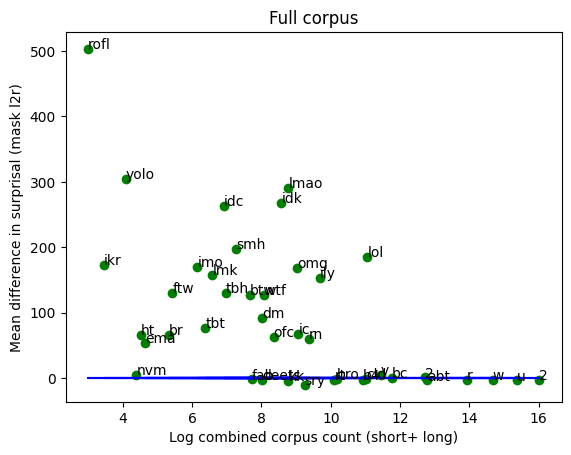

In [201]:
# replicate what mahwold did but with our pairs: modeling difference in log
#frequency between short and long forms as a predictor for difference in surprisal
from matplotlib import pyplot as plt
import pandas as pd
df = pd.read_csv("../data_new.csv")
df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])
# drop where any count is 0
df_drop_nan = df[df['count_fl'] != 0]
df_drop_nan = df_drop_nan[df_drop_nan['count_abbr'] != 0]

# drop where any surprisal is NaN, it should be taken care of already
df_drop_nan = df_drop_nan[df_drop_nan['fl_mask_l2r_surprisal_mean'].notna()]
df_drop_nan = df_drop_nan[df_drop_nan['abbr_mask_l2r_surprisal_mean'].notna()]

# drop instances where the token for the abbreviation is <unk>
df_drop_nan = df_drop_nan[~df_drop_nan["abbreviation"].isin(bertweet_unknown_abbreviations)]

# get stats for log(fl_freq + abbr_freq)
x_log_freq = df_drop_nan["count_fl"] + df_drop_nan["count_abbr"]
x_log_freq = np.log2(x_log_freq).to_numpy()
x_log_freq =  x_log_freq[:, None]

# predict surprisal
y_diff_in_surprisal = df_drop_nan["fl_mask_l2r_surprisal_mean"] - df_drop_nan["abbr_mask_l2r_surprisal_mean"] 
y_diff_in_surprisal = y_diff_in_surprisal.to_numpy()
weights = np.ones_like(y_diff_in_surprisal)
reg = LinearRegression(copy_X=True, fit_intercept=True).fit(x_log_freq, y_diff_in_surprisal, weights)
r_squared = reg.score(x_log_freq, y_diff_in_surprisal)

y_predict = reg.predict(x_log_freq)
mse = (((y_diff_in_surprisal - y_predict)**2 * weights).sum() / weights.sum())**.5
print(mse, r_squared, reg.intercept_)
fig, ax = plt.subplots()
ax.scatter(x_log_freq, y_diff_in_surprisal,color='g')
for i, txt in enumerate(df_drop_nan["abbreviation"].to_list()):
    ax.annotate(txt, (x_log_freq[i], y_diff_in_surprisal[i]))
# plt.plot(x_log_freq, reg.predict(x_log_freq),color='red')
plt.xlabel("Log combined corpus count (short+ long)")
plt.title("Full corpus")
plt.ylabel("Mean difference in surprisal (mask l2r)")
plt.plot(x_log_freq, np.zeros_like(x_log_freq),color='blue')
corr_pearson, p_value_pearson = scipy.stats.pearsonr(x_log_freq[:, 0], y_diff_in_surprisal)
corr_spearman, p_value_spearman = scipy.stats.spearmanr(x_log_freq[:, 0], y_diff_in_surprisal)
print(corr_pearson, p_value_pearson)
print(corr_spearman, p_value_spearman )

# basically this means that frequency is not a very good predictor i think

99.40513077885038 0.06355608802950374 249.89056918229522
-0.2521033280809747 0.23466298546007208
-0.08782608695652173 0.6832152692148052


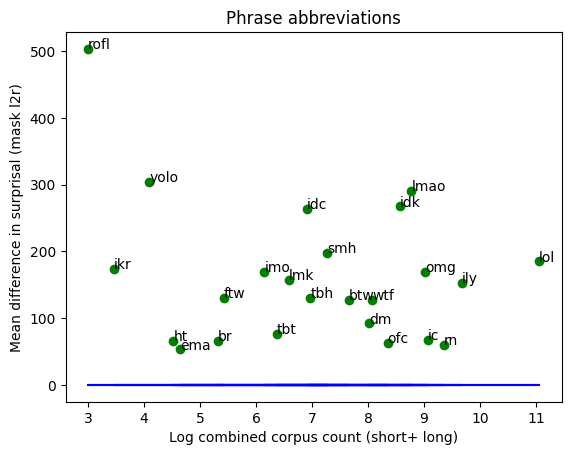

In [202]:
# replicate what mahwold did but with our pairs: modeling difference in log
#frequency between short and long forms as a predictor for difference in surprisal
from matplotlib import pyplot as plt
import pandas as pd
df = pd.read_csv("../data_new.csv")
df = df[df['full_length'].str.contains(" ")] # just look at the phrases
df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])
# drop where any count is 0
df_drop_nan = df[df['count_fl'] != 0]
df_drop_nan = df_drop_nan[df_drop_nan['count_abbr'] != 0]

# drop where any surprisal is NaN, it should be taken care of already
df_drop_nan = df_drop_nan[df_drop_nan['fl_mask_l2r_surprisal_mean'].notna()]
df_drop_nan = df_drop_nan[df_drop_nan['abbr_mask_l2r_surprisal_mean'].notna()]

# drop instances where the token for the abbreviation is <unk>
df_drop_nan = df_drop_nan[~df_drop_nan["abbreviation"].isin(bertweet_unknown_abbreviations)]

# get stats for log(fl_freq + abbr_freq)
x_log_freq = df_drop_nan["count_fl"] + df_drop_nan["count_abbr"]
x_log_freq = np.log2(x_log_freq).to_numpy()
x_log_freq =  x_log_freq[:, None]

# predict surprisal
y_diff_in_surprisal = df_drop_nan["fl_mask_l2r_surprisal_mean"] - df_drop_nan["abbr_mask_l2r_surprisal_mean"] 
y_diff_in_surprisal = y_diff_in_surprisal.to_numpy()
weights = np.ones_like(y_diff_in_surprisal)
reg = LinearRegression(copy_X=True, fit_intercept=True).fit(x_log_freq, y_diff_in_surprisal, weights)
r_squared = reg.score(x_log_freq, y_diff_in_surprisal)

y_predict = reg.predict(x_log_freq)
mse = (((y_diff_in_surprisal - y_predict)**2 * weights).sum() / weights.sum())**.5
print(mse, r_squared, reg.intercept_)
fig, ax = plt.subplots()
ax.scatter(x_log_freq, y_diff_in_surprisal,color='g')
for i, txt in enumerate(df_drop_nan["abbreviation"].to_list()):
    ax.annotate(txt, (x_log_freq[i], y_diff_in_surprisal[i]))
# plt.plot(x_log_freq, reg.predict(x_log_freq),color='red')
plt.xlabel("Log combined corpus count (short+ long)")
plt.title("Phrase abbreviations")
plt.ylabel("Mean difference in surprisal (mask l2r)")
plt.plot(x_log_freq, np.zeros_like(x_log_freq),color='blue')
corr_pearson, p_value_pearson = scipy.stats.pearsonr(x_log_freq[:, 0], y_diff_in_surprisal)
corr_spearman, p_value_spearman = scipy.stats.spearmanr(x_log_freq[:, 0], y_diff_in_surprisal)
print(corr_pearson, p_value_pearson)
print(corr_spearman, p_value_spearman )

# basically this means that frequency is not a very good predictor i think

3.3111832695673047 0.04357375549195619 0.6818788791277628
-0.20874327651916352 0.42137980588851903
-0.14460784313725492 0.5797547992794121


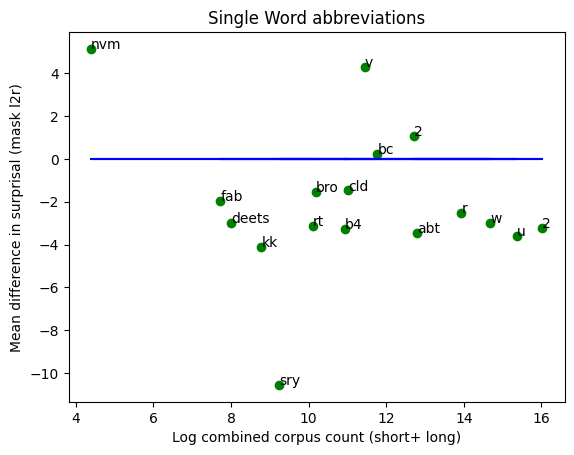

In [203]:
# replicate what mahwold did but with our pairs: modeling difference in log
#frequency between short and long forms as a predictor for difference in surprisal
from matplotlib import pyplot as plt
import pandas as pd
df = pd.read_csv("../data_new.csv")
df = df[~df['full_length'].str.contains(" ")] # just look at the single word
df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])
# drop where any count is 0
df_drop_nan = df[df['count_fl'] != 0]
df_drop_nan = df_drop_nan[df_drop_nan['count_abbr'] != 0]

# drop where any surprisal is NaN, it should be taken care of already
df_drop_nan = df_drop_nan[df_drop_nan['fl_mask_l2r_surprisal_mean'].notna()]
df_drop_nan = df_drop_nan[df_drop_nan['abbr_mask_l2r_surprisal_mean'].notna()]

# drop instances where the token for the abbreviation is <unk>
df_drop_nan = df_drop_nan[~df_drop_nan["abbreviation"].isin(bertweet_unknown_abbreviations)]

# get stats for log(fl_freq + abbr_freq)
x_log_freq = df_drop_nan["count_fl"] + df_drop_nan["count_abbr"]
x_log_freq = np.log2(x_log_freq).to_numpy()
x_log_freq =  x_log_freq[:, None]

# predict surprisal
y_diff_in_surprisal = df_drop_nan["fl_mask_l2r_surprisal_mean"] - df_drop_nan["abbr_mask_l2r_surprisal_mean"] 
y_diff_in_surprisal = y_diff_in_surprisal.to_numpy()
weights = np.ones_like(y_diff_in_surprisal)
reg = LinearRegression(copy_X=True, fit_intercept=True).fit(x_log_freq, y_diff_in_surprisal, weights)
r_squared = reg.score(x_log_freq, y_diff_in_surprisal)

y_predict = reg.predict(x_log_freq)
mse = (((y_diff_in_surprisal - y_predict)**2 * weights).sum() / weights.sum())**.5
print(mse, r_squared, reg.intercept_)
fig, ax = plt.subplots()
ax.scatter(x_log_freq, y_diff_in_surprisal,color='g')
for i, txt in enumerate(df_drop_nan["abbreviation"].to_list()):
    ax.annotate(txt, (x_log_freq[i], y_diff_in_surprisal[i]))
# plt.plot(x_log_freq, reg.predict(x_log_freq),color='red')
plt.xlabel("Log combined corpus count (short+ long)")
plt.title("Single Word abbreviations")
plt.ylabel("Mean difference in surprisal (mask l2r)")
plt.plot(x_log_freq, np.zeros_like(x_log_freq),color='blue')
corr_pearson, p_value_pearson = scipy.stats.pearsonr(x_log_freq[:, 0], y_diff_in_surprisal)
corr_spearman, p_value_spearman = scipy.stats.spearmanr(x_log_freq[:, 0], y_diff_in_surprisal)
print(corr_pearson, p_value_pearson)
print(corr_spearman, p_value_spearman )

# basically this means that frequency is not a very good predictor i think

4.762130011026471 0.03808956784897699 -5.398926558921696
0.1951654883655843 0.360768029924533
0.15304347826086956 0.4752549676743846


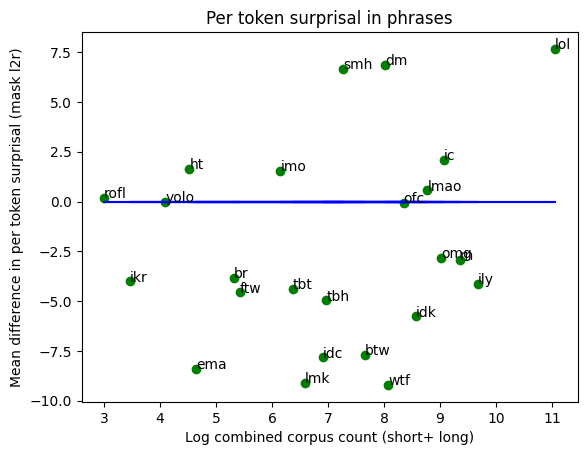

In [204]:
# replicate what mahwold did but with our pairs: modeling difference in log
#frequency between short and long forms as a predictor for difference in surprisal
from matplotlib import pyplot as plt
import pandas as pd
df = pd.read_csv("../data_new.csv")
df = df[df['full_length'].str.contains(" ")] # just look at phrases
df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])
# drop where any count is 0
df_drop_nan = df[df['count_fl'] != 0]
df_drop_nan = df_drop_nan[df_drop_nan['count_abbr'] != 0]

# drop where any surprisal is NaN, it should be taken care of already
df_drop_nan = df_drop_nan[df_drop_nan['fl_mask_l2r_avg_per_token'].notna()]
df_drop_nan = df_drop_nan[df_drop_nan['abbr_mask_l2r_avg_per_token'].notna()]

# drop instances where the token for the abbreviation is <unk>
df_drop_nan = df_drop_nan[~df_drop_nan["abbreviation"].isin(bertweet_unknown_abbreviations)]

# get stats for log(fl_freq + abbr_freq)
x_log_freq = df_drop_nan["count_fl"] + df_drop_nan["count_abbr"]
x_log_freq = np.log2(x_log_freq).to_numpy()
x_log_freq =  x_log_freq[:, None]

# predict surprisal
y_diff_in_surprisal = df_drop_nan["fl_mask_l2r_avg_per_token"] - df_drop_nan["abbr_mask_l2r_avg_per_token"] 
y_diff_in_surprisal = y_diff_in_surprisal.to_numpy()
weights = np.ones_like(y_diff_in_surprisal)
reg = LinearRegression(copy_X=True, fit_intercept=True).fit(x_log_freq, y_diff_in_surprisal, weights)
r_squared = reg.score(x_log_freq, y_diff_in_surprisal)

y_predict = reg.predict(x_log_freq)
mse = (((y_diff_in_surprisal - y_predict)**2 * weights).sum() / weights.sum())**.5
print(mse, r_squared, reg.intercept_)
fig, ax = plt.subplots()
ax.scatter(x_log_freq, y_diff_in_surprisal,color='g')
for i, txt in enumerate(df_drop_nan["abbreviation"].to_list()):
    ax.annotate(txt, (x_log_freq[i], y_diff_in_surprisal[i]))
# plt.plot(x_log_freq, reg.predict(x_log_freq),color='red')
plt.xlabel("Log combined corpus count (short+ long)")
plt.title("Per token surprisal in phrases")
plt.ylabel("Mean difference in per token surprisal (mask l2r)")
plt.plot(x_log_freq, np.zeros_like(x_log_freq),color='blue')
corr_pearson, p_value_pearson = scipy.stats.pearsonr(x_log_freq[:, 0], y_diff_in_surprisal)
corr_spearman, p_value_spearman = scipy.stats.spearmanr(x_log_freq[:, 0], y_diff_in_surprisal)
print(corr_pearson, p_value_pearson)
print(corr_spearman, p_value_spearman )

# basically this means that frequency is not a very good predictor i think

0.10566799217949625 0.2675750858624998 0.628747104685146


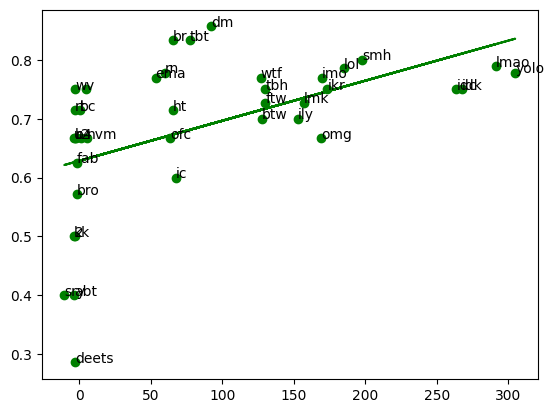

In [205]:
from matplotlib import pyplot as plt
df = pd.read_csv("../data_new.csv")
df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])

# drop where any count is 0
df_drop_nan = df[df['count_fl'] > 1]
df_drop_nan = df_drop_nan[df_drop_nan['count_abbr'] >1]
df_drop_nan = df_drop_nan[~df_drop_nan["abbreviation"].isin(bertweet_unknown_abbreviations)]

# drop where any surprisal is NaN, it should be taken care of already
# df_drop_nan = df_drop_nan[df_drop_nan['fl_mask_l2r_surprisal_mean'].notna()]
# df_drop_nan = df_drop_nan[df_drop_nan['abbr_mask_l2r_surprisal_mean'].notna()]

# drop instances where the token for the abbreviation is <unk>
# plot for diff in surprisal predicting compression
x_diff_in_surprisal = df_drop_nan["fl_mask_l2r_surprisal_mean"] - df_drop_nan["abbr_mask_l2r_surprisal_mean"]
x_diff_in_surprisal = x_diff_in_surprisal.to_numpy()
x_diff_in_surprisal =  x_diff_in_surprisal[:, None]
y_compression = df_drop_nan["compression"]
y_compression = y_compression.to_numpy()
weights = np.ones_like(y_compression)
reg = LinearRegression(copy_X=True, fit_intercept=True).fit(x_diff_in_surprisal, y_compression, weights)
r_squared = reg.score(x_diff_in_surprisal, y_compression)

y_predict = reg.predict(x_diff_in_surprisal)
mse = (((y_compression - y_predict)**2 * weights).sum() / weights.sum())**.5
print(mse, r_squared, reg.intercept_)
fig, ax = plt.subplots()

ax.scatter(x_diff_in_surprisal, y_compression,color='g')
ax.plot(x_diff_in_surprisal, reg.predict(x_diff_in_surprisal),color='g')
for i, txt in enumerate(df_drop_nan["abbreviation"].to_list()):
    ax.annotate(txt, (x_diff_in_surprisal[i], y_compression[i]))

0.12136772494017012 0.14619719267480735 0.8219506193693263


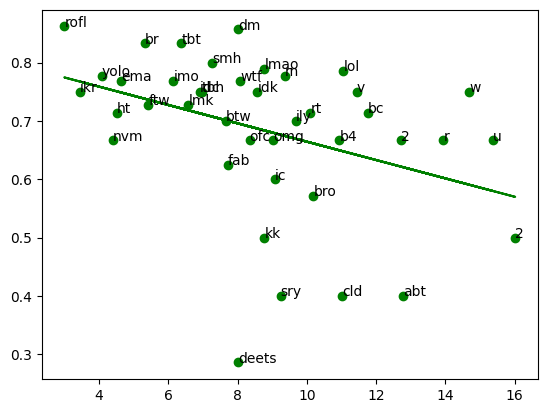

In [206]:

df = pd.read_csv("../data_new.csv")
df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])

# drop where any count is 0
df_drop_nan = df[df['count_fl'] != 0]
df_drop_nan = df_drop_nan[df_drop_nan['count_abbr'] != 0]

# drop where any surprisal is NaN, it should be taken care of already
df_drop_nan = df_drop_nan[df_drop_nan['fl_mask_l2r_surprisal_mean'].notna()]
df_drop_nan = df_drop_nan[df_drop_nan['abbr_mask_l2r_surprisal_mean'].notna()]

# drop instances where the token for the abbreviation is <unk>
df_drop_nan = df_drop_nan[~df_drop_nan["abbreviation"].isin(bertweet_unknown_abbreviations)]

# frequency (log of sum) as a predictor for compression
x_diff_in_freq = df_drop_nan["count_fl"] + df_drop_nan["count_abbr"]
x_diff_in_freq = np.log2(x_diff_in_freq.to_numpy())
x_diff_in_freq =  x_diff_in_freq[:, None]
y_compression = df_drop_nan["compression"]
y_compression = y_compression.to_numpy()
weights = np.ones_like(y_compression)
reg = LinearRegression(copy_X=True, fit_intercept=True).fit(x_diff_in_freq, y_compression, weights)
r_squared = reg.score(x_diff_in_freq, y_compression)

y_predict = reg.predict(x_diff_in_freq)
mse = (((y_compression - y_predict)**2 * weights).sum() / weights.sum())**.5
print(mse, r_squared, reg.intercept_)
fig, ax = plt.subplots()

ax.scatter(x_diff_in_freq, y_compression,color='g')
ax.plot(x_diff_in_freq, reg.predict(x_diff_in_freq),color='g')
for i, txt in enumerate(df_drop_nan["abbreviation"].to_list()):
    ax.annotate(txt, (x_diff_in_freq[i], y_compression[i]))


frequency
rsquared, mse:  0.03808380988444515 0.12882289036964717
pearson corr, pvalue:  0.19515073631540597 0.22143225871531738
spearman corr, pvalue:  0.034007705247047146 0.8328230213249247
surprisal sequential
rsquared, mse:  0.3397322657994414 0.10672949616435634
pearson corr, pvalue:  0.5828655640878445 6.366987237709662e-05
spearman corr, pvalue:  0.7050665123057711 2.65349701396478e-07
surprisal mask all
rsquared, mse:  0.29942456656163596 0.10993902319430995
pearson corr, pvalue:  0.5471970089114485 0.00021368272174941707
spearman corr, pvalue:  0.6920259325722111 5.402402846872412e-07
word length
rsquared, mse:  0.38987609548665514 0.1025967118814255
pearson corr, pvalue:  0.6244005889544428 1.2838749192598669e-05
spearman corr, pvalue:  0.7959702271365898 4.950515440841943e-10


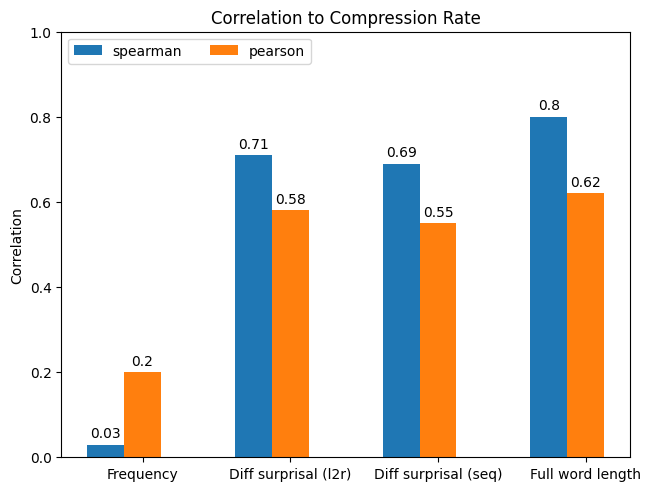

In [214]:
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy
df = pd.read_csv("../data_new.csv")
df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])
drop_unknowns = df[~df["abbreviation"].isin(bertweet_unknown_abbreviations)]
drop_unknowns = drop_unknowns[drop_unknowns['count_fl'] != 0]
drop_unknowns = drop_unknowns[drop_unknowns['count_abbr'] != 0]
corrs = {"spearman": [], "pearson": []}

for idx in range(4):
    if idx == 0:
        
        df_drop_nan["frequency"] = np.log2(df_drop_nan["count_abbr"] + df_drop_nan['count_abbr'])
        X = df_drop_nan[["frequency"]].to_numpy()
    elif idx == 1:
        df_drop_nan = drop_unknowns[drop_unknowns['fl_mask_l2r_surprisal_mean'].notna()]
        df_drop_nan = df_drop_nan[df_drop_nan['abbr_mask_l2r_surprisal_mean'].notna()]

        df_drop_nan["surprisal_seq"] = df_drop_nan["fl_sequential_surprisal_mean"] - df_drop_nan["abbr_sequential_surprisal_mean"] 
        X = df_drop_nan[["surprisal_seq"]].to_numpy()
    elif idx == 2:
        df_drop_nan = drop_unknowns[drop_unknowns['abbr_mask_l2r_surprisal_mean'].notna()]
        df_drop_nan = df_drop_nan[df_drop_nan['fl_mask_l2r_surprisal_mean'].notna()]

        df_drop_nan["surprisal_mask_l2r"] = df_drop_nan["fl_mask_l2r_surprisal_mean"] - df_drop_nan["abbr_mask_l2r_surprisal_mean"] 
        X = df_drop_nan[["surprisal_mask_l2r"]].to_numpy()

    else:
        df_drop_nan = drop_unknowns[drop_unknowns['count_fl'] != 0]
        df_drop_nan = df_drop_nan[df_drop_nan['count_abbr'] != 0]
        X = df_drop_nan[["fl_len"]].to_numpy()
    y = df_drop_nan["compression"].to_numpy()
    weights = np.ones_like(y)

    reg = LinearRegression(copy_X=True, fit_intercept=True).fit(X, y, weights)
    r_squared = reg.score(X, y)

    y_predict = reg.predict(X)

    mse = (((y - y_predict)**2 * weights).sum() / weights.sum())**.5

    corr_pearson, p_value_pearson = scipy.stats.pearsonr(X[:, 0], y)
    corr_spearman, p_value_spearman = scipy.stats.spearmanr(X[:, 0], y)
    corrs["pearson"].append(corr_pearson.round(2))
    corrs["spearman"].append(corr_spearman.round(2))

    if idx == 0:
        print("frequency")
    elif idx == 1:
        print("surprisal sequential")
    elif idx == 2:
        print("surprisal mask all")
    else:
        print("word length")
    print("rsquared, mse: ", r_squared, mse)
    print("pearson corr, pvalue: ", corr_pearson, p_value_pearson)
    print("spearman corr, pvalue: ", corr_spearman, p_value_spearman)

# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

groups = ("Frequency", "Diff surprisal (l2r)", "Diff surprisal (seq)", "Full word length")


x = np.arange(4)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in corrs.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Correlation')
ax.set_title('Correlation to Compression Rate')
ax.set_xticks(x + width, groups)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)

plt.show()

frequency
rsquared, mse:  0.43728234358815665 0.10446852813689397
pearson corr, pvalue:  0.6612732745152766 0.003844598313598062
spearman corr, pvalue:  0.5854883940701529 0.013537640264833792
surprisal sequential
rsquared, mse:  0.1531420401527117 0.05602230263687557
pearson corr, pvalue:  0.3913336685652178 0.058623885745869
spearman corr, pvalue:  0.2868394023269038 0.1741578131799674
surprisal mask all
rsquared, mse:  0.1118777832530361 0.057370949216297734
pearson corr, pvalue:  0.33448136458259675 0.11014345146961853
spearman corr, pvalue:  0.23357546460409975 0.27199576719174595
word length
rsquared, mse:  0.5630157424830347 0.04024283464303738
pearson corr, pvalue:  0.7503437495461893 2.412830189452762e-05
spearman corr, pvalue:  0.8419467222736026 2.501699351083601e-07
<BarContainer object of 4 artists>
<BarContainer object of 4 artists>


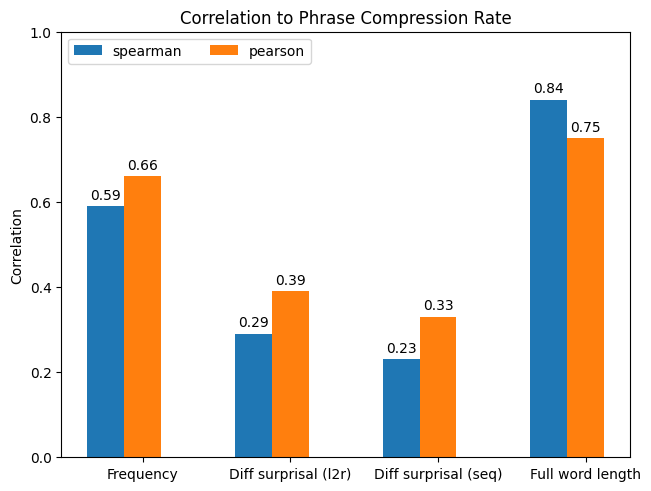

In [227]:
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy
df = pd.read_csv("../data_new.csv")
df = df[df['full_length'].str.contains(" ")]
df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])
drop_unknowns = df[~df["abbreviation"].isin(bertweet_unknown_abbreviations)]
drop_unknowns = drop_unknowns[drop_unknowns['count_fl'] != 0]
drop_unknowns = drop_unknowns[drop_unknowns['count_abbr'] != 0]
corrs = {"spearman": [], "pearson": []}
groups= []
for idx in range(4):
    if idx == 0:
        
        df_drop_nan["frequency"] = np.log2(df_drop_nan["count_abbr"] + df_drop_nan['count_abbr'])
        X = df_drop_nan[["frequency"]].to_numpy()
    elif idx == 1:
        df_drop_nan = drop_unknowns[drop_unknowns['fl_mask_l2r_surprisal_mean'].notna()]
        df_drop_nan = df_drop_nan[df_drop_nan['abbr_mask_l2r_surprisal_mean'].notna()]

        df_drop_nan["surprisal_seq"] = df_drop_nan["fl_sequential_surprisal_mean"] - df_drop_nan["abbr_sequential_surprisal_mean"] 
        X = df_drop_nan[["surprisal_seq"]].to_numpy()
    elif idx == 2:
        df_drop_nan = drop_unknowns[drop_unknowns['abbr_mask_l2r_surprisal_mean'].notna()]
        df_drop_nan = df_drop_nan[df_drop_nan['fl_mask_l2r_surprisal_mean'].notna()]

        df_drop_nan["surprisal_mask_l2r"] = df_drop_nan["fl_mask_l2r_surprisal_mean"] - df_drop_nan["abbr_mask_l2r_surprisal_mean"] 
        X = df_drop_nan[["surprisal_mask_l2r"]].to_numpy()

    else:
        df_drop_nan = drop_unknowns[drop_unknowns['count_fl'] != 0]
        df_drop_nan = df_drop_nan[df_drop_nan['count_abbr'] != 0]
        X = df_drop_nan[["fl_len"]].to_numpy()
    y = df_drop_nan["compression"].to_numpy()
    weights = np.ones_like(y)

    reg = LinearRegression(copy_X=True, fit_intercept=True).fit(X, y, weights)
    r_squared = reg.score(X, y)

    y_predict = reg.predict(X)

    mse = (((y - y_predict)**2 * weights).sum() / weights.sum())**.5

    corr_pearson, p_value_pearson = scipy.stats.pearsonr(X[:, 0], y)
    corr_spearman, p_value_spearman = scipy.stats.spearmanr(X[:, 0], y)
    corrs["pearson"].append((corr_pearson.round(2), p_value_pearson))
    corrs["spearman"].append((corr_spearman.round(2), p_value_spearman))
    if idx == 0:
        group = "Frequency"
        print("frequency")
    elif idx == 1:
        group = "Diff surprisal (l2r)"

        print("surprisal sequential")
    elif idx == 2:
        group = "Diff surprisal (seq)"
        print("surprisal mask all")
    else:
        group = "Full word length"
        print("word length")
    groups.append(group)
    print("rsquared, mse: ", r_squared, mse)
    print("pearson corr, pvalue: ", corr_pearson, p_value_pearson)
    print("spearman corr, pvalue: ", corr_spearman, p_value_spearman)

# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np


x = np.arange(4)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in corrs.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Correlation')
ax.set_title('Correlation to Phrase Compression Rate')
ax.set_xticks(x + width, groups)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)

plt.show()

frequency
rsquared, mse:  0.43728234358815665 0.10446852813689397
pearson corr, pvalue:  0.6612732745152766 0.003844598313598062
spearman corr, pvalue:  0.5854883940701529 0.013537640264833792
surprisal sequential
rsquared, mse:  0.23774775847105378 0.12158767666448317
pearson corr, pvalue:  0.48759384580924897 0.04709976951369952
spearman corr, pvalue:  0.38011609441685384 0.13231275962308178
surprisal mask all
rsquared, mse:  0.0001679073441691603 0.13925273738533397
pearson corr, pvalue:  -0.012957906627591276 0.9606332421991296
spearman corr, pvalue:  -0.06317150905161108 0.8096611403748399


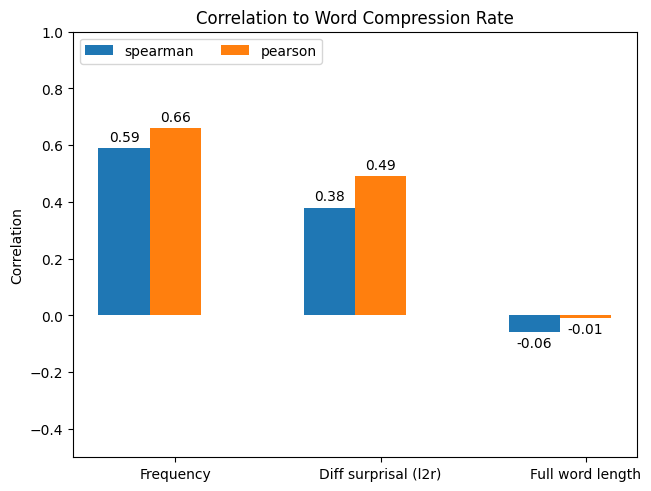

In [226]:
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy
df = pd.read_csv("../data_new.csv")
df = df[~df['full_length'].str.contains(" ")]
df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])
drop_unknowns = df[~df["abbreviation"].isin(bertweet_unknown_abbreviations)]
drop_unknowns = drop_unknowns[drop_unknowns['count_fl'] != 0]
drop_unknowns = drop_unknowns[drop_unknowns['count_abbr'] != 0]
corrs = {"spearman": [], "pearson": []}

for idx in range(3):
    if idx == 0:
        
        df_drop_nan["frequency"] = np.log2(df_drop_nan["count_abbr"] + df_drop_nan['count_abbr'])
        X = df_drop_nan[["frequency"]].to_numpy()
    elif idx == 1:
        df_drop_nan = drop_unknowns[drop_unknowns['fl_mask_l2r_surprisal_mean'].notna()]
        df_drop_nan = df_drop_nan[df_drop_nan['abbr_mask_l2r_surprisal_mean'].notna()]

        df_drop_nan["surprisal_seq"] = df_drop_nan["fl_sequential_surprisal_mean"] - df_drop_nan["abbr_sequential_surprisal_mean"] 
        X = df_drop_nan[["surprisal_seq"]].to_numpy()
    # elif idx == 2:
    #     df_drop_nan = drop_unknowns[drop_unknowns['abbr_mask_l2r_surprisal_mean'].notna()]
    #     df_drop_nan = df_drop_nan[df_drop_nan['fl_mask_l2r_surprisal_mean'].notna()]

    #     df_drop_nan["surprisal_mask_l2r"] = df_drop_nan["fl_mask_l2r_surprisal_mean"] - df_drop_nan["abbr_mask_l2r_surprisal_mean"] 
    #     X = df_drop_nan[["surprisal_mask_l2r"]].to_numpy()

    else:
        df_drop_nan = drop_unknowns[drop_unknowns['count_fl'] != 0]
        df_drop_nan = df_drop_nan[df_drop_nan['count_abbr'] != 0]
        X = df_drop_nan[["fl_len"]].to_numpy()
    y = df_drop_nan["compression"].to_numpy()
    weights = np.ones_like(y)

    reg = LinearRegression(copy_X=True, fit_intercept=True).fit(X, y, weights)
    r_squared = reg.score(X, y)

    y_predict = reg.predict(X)

    mse = (((y - y_predict)**2 * weights).sum() / weights.sum())**.5

    corr_pearson, p_value_pearson = scipy.stats.pearsonr(X[:, 0], y)
    corr_spearman, p_value_spearman = scipy.stats.spearmanr(X[:, 0], y)
    corrs["pearson"].append(corr_pearson.round(2))
    corrs["spearman"].append(corr_spearman.round(2))

    if idx == 0:
        print("frequency")
    elif idx == 1:
        print("surprisal sequential")
    elif idx == 2:
        print("surprisal mask all")
    else:
        print("word length")
    print("rsquared, mse: ", r_squared, mse)
    print("pearson corr, pvalue: ", corr_pearson, p_value_pearson)
    print("spearman corr, pvalue: ", corr_spearman, p_value_spearman)

# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

groups = ("Frequency", "Diff surprisal (l2r)", "Full word length")


x = np.arange(3)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in corrs.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Correlation')
ax.set_title('Correlation to Word Compression Rate')
ax.set_xticks(x + width, groups)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(-0.5, 1)

plt.show()

In [217]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import StandardScaler

import scipy
df = pd.read_csv("../data_new.csv")
df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])
drop_unknowns = df[~df["abbreviation"].isin(bertweet_unknown_abbreviations)]
df_drop_nan = drop_unknowns[drop_unknowns['count_fl'] != 0]
df_drop_nan = df_drop_nan[df_drop_nan['count_abbr'] != 0]
df_drop_nan = df_drop_nan[df_drop_nan['fl_mask_l2r_surprisal_mean'].notna()]
df_drop_nan = df_drop_nan[df_drop_nan['abbr_mask_l2r_surprisal_mean'].notna()]
df_drop_nan = df_drop_nan[df_drop_nan['abbr_mask_l2r_surprisal_mean'].notna()]
df_drop_nan = df_drop_nan[df_drop_nan['fl_mask_l2r_surprisal_mean'].notna()]

df_drop_nan["frequency"] = np.log2(df_drop_nan["count_abbr"] + df_drop_nan['count_abbr'])
df_drop_nan["surprisal_seq"] = df_drop_nan["fl_sequential_surprisal_mean"] - df_drop_nan["abbr_sequential_surprisal_mean"]
df_drop_nan["surprisal_mask_l2r"] = df_drop_nan["fl_mask_l2r_surprisal_mean"] - df_drop_nan["abbr_mask_l2r_surprisal_mean"] 
X= df_drop_nan[["surprisal_mask_l2r", "surprisal_seq", "fl_len"]].to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = df_drop_nan["compression"].to_numpy()
weights = np.ones_like(y)

reg = LinearRegression(copy_X=True, fit_intercept=True).fit(X, y, weights)
r_squared = reg.score(X, y)

y_predict = reg.predict(X)
reg.coef_


    

array([-0.10469144,  0.1795241 ])